In [24]:
from PreprocessIndeed import PreprocessIndeed
from MLIndeed import MLIndeed
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


countVec_titre = CountVectorizer(ngram_range=(1, 2), min_df=.005, max_df=0.8)
countVec_description = CountVectorizer(ngram_range=(1, 2), min_df=.02, max_df=0.8)
preprocess = PreprocessIndeed('data/BDD_14_10_2019.json')

preprocess.preprocess_df(countVec_titre, countVec_description, correlation_description=0.1, correlation_titre=0.1, save_name='10correlation')

X_train, X_test, y_train, y_test = \
    train_test_split(preprocess.df.drop(['Salaire'], axis=1),
                     preprocess.df['Salaire'],
                     test_size=0.25, random_state=0)



In [25]:
params={'Log Reg': {'C': [0.01, 0.1, 1, 10]},
        'SVM': {'kernel': ['rbf','linear'], 'C': [1, 10, 50, 100, 500], 'gamma': [0.1, 1]},
        'Random Forest': {'n_estimators':  [10, 50, 100, 200], 'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 3, 5, 6], 'max_features': [2, 3, 5, 6]},
        'Ada Boost': {'n_estimators':  [10, 50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
        'Gradient Boost': {'n_estimators':  [10, 20, 30], 'learning_rate': [0.01, 0.1, 1],
                           'max_depth': [2, 3, 4, 5]},
        'X Gradient Boost': {'n_estimators':  [10, 20, 25], 'max_depth': [2, 3, 4, 5, 6]}}


models = MLIndeed(X_train, X_test, y_train, y_test)
models.best_models(params, 'accuracy')
print(preprocess.df.shape)
print(models.accuracy())
models.save_models(save_name='all_features')

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Mini

(2196, 137)
{'Log reg': {'test_accuracy': 0.7741347905282332, 'train_accuracy': 0.8142076502732241}, 'SVM': {'test_accuracy': 0.7723132969034608, 'train_accuracy': 0.8348512446873103}, 'Random Forest': {'test_accuracy': 0.7085610200364298, 'train_accuracy': 0.7024893746205222}, 'Ada Boost': {'test_accuracy': 0.726775956284153, 'train_accuracy': 0.718882817243473}, 'Gradient Boost': {'test_accuracy': 0.8087431693989071, 'train_accuracy': 0.8785670916818458}, 'X Gradient Boost': {'test_accuracy': 0.7923497267759563, 'train_accuracy': 0.8391013964784456}}


In [26]:
from sklearn.metrics import confusion_matrix
print('Log reg : \n'+ str( confusion_matrix(models.bestModels['Log reg'].best_estimator_.predict(X_test),y_test)))
print('SVM : \n'+ str( confusion_matrix(models.bestModels['SVM'].best_estimator_.predict(X_test),y_test)))
print('Random Forest : \n'+ str( confusion_matrix(models.bestModels['Random Forest'].best_estimator_.predict(X_test),y_test)))
print('Ada Boost : \n'+ str( confusion_matrix(models.bestModels['Ada Boost'].best_estimator_.predict(X_test),y_test)))
print('Gradient Boost : \n'+ str( confusion_matrix(models.bestModels['Gradient Boost'].best_estimator_.predict(X_test),y_test)))
print('X Gradient Boost : \n'+ str( confusion_matrix(models.bestModels['X Gradient Boost'].best_estimator_.predict(X_test),y_test)))

Log reg : 
[[ 29   1   0   0]
 [  7 270  52   4]
 [  3  40 117  14]
 [  0   0   3   9]]
SVM : 
[[ 30   4   1   1]
 [  7 264  47   4]
 [  2  42 118  10]
 [  0   1   6  12]]
Random Forest : 
[[ 26   0   0   0]
 [ 10 279  92  14]
 [  3  32  80   9]
 [  0   0   0   4]]
Ada Boost : 
[[ 28   0   0   0]
 [  9 263  71   7]
 [  2  48 100  12]
 [  0   0   1   8]]
Gradient Boost : 
[[ 30   0   0   0]
 [  6 274  43   2]
 [  2  37 129  14]
 [  1   0   0  11]]
X Gradient Boost : 
[[ 29   0   1   0]
 [  7 274  46   3]
 [  2  37 124  16]
 [  1   0   1   8]]


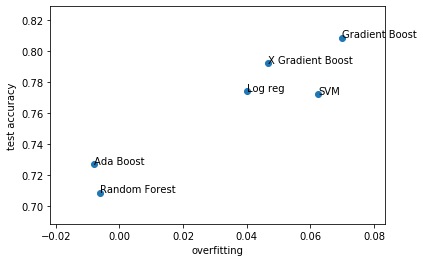

In [27]:
# plot accuracy test function of the overfit
accuracy= models.accuracy()
overfit = [accuracy[x]['train_accuracy'] - accuracy[x]['test_accuracy'] for x in accuracy]
accuracy_test = [accuracy[x]['test_accuracy'] for x in accuracy]
labels = [x for x in accuracy]

fig, ax = plt.subplots()
ax.scatter(overfit, accuracy_test)
plt.xlabel('overfitting')
plt.ylabel('test accuracy')

for i, txt in enumerate(labels):
    ax.annotate(txt, (overfit[i], accuracy_test[i]))

# K-means

In [4]:
from PreprocessIndeed import preprocess_salaires
df = preprocess.data.loc[preprocess.data['Salaire'] != 'None', :]
df = df.loc[df['Descriptif_du_poste'] != 'None', :]
df = df.loc[df['Salaire'].apply(lambda x: 'semaine' not in x), :]
df['Salaire'] = df['Salaire'].apply(preprocess_salaires)

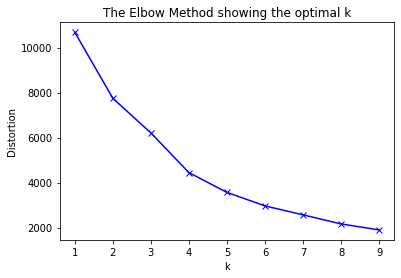

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
distortions = []
X=df['Salaire'].values.reshape(-1,1)
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.figure(1, figsize=(10, 6))
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=4, random_state=0 )
kmeanModel.fit(X)
kmeanModel.cluster_centers_

In [ ]:
print((12171.94444444+36557.32519616)/2)
print((36557.32519616+51244.98018494)/2)
print((51244.98018494+83879.94196429)/2)

In [ ]:
# save the df preprocessed
preprocess.df.to_csv('dataframes/preprocessed_all_features.csv')

# Clean features

In [28]:
df = preprocess.df.copy()
for i in X_test.columns:
    print(i)

Ville_Banlieue_de_Bordeaux
Ville_Banlieue_de_Lyon
Ville_Banlieue_de_Nantes
Ville_Banlieue_de_Paris
Ville_Banlieue_de_Toulouse
Ville_Bordeaux
Ville_Lyon
Ville_Nantes
Ville_Paris
Ville_Toulouse
Titre_chef_projet
Titre_data
Titre_data_scientist
Titre_developpeur_web
Titre_directeur
Titre_freelance
Titre_junior
Titre_lead_data
Titre_marketing
Titre_mois
Titre_projet
Titre_ref
Titre_scientist
Titre_senior
Titre_stage
Titre_stage_chef
Titre_stage_developpeur
Titre_stagiaire
Titre_web
Description_alternance
Description_an
Description_an_souhaite
Description_ans_experience
Description_ans_paris
Description_apprentissage
Description_architecture
Description_aws
Description_bac
Description_bac_bac
Description_bac_bts
Description_bac_minimum
Description_backend
Description_backend_developer
Description_bonnes_pratiques
Description_brut
Description_bts
Description_bts_dut
Description_capacite_travailler
Description_cdd
Description_cdi_environ
Description_commerce
Description_confirme
Description_c

In [29]:
df = preprocess.df.copy()
# regroupements
df['Titre_stage']=df['Titre_stage'] + df['Titre_stage_chef'] + df['Titre_stage_developpeur'] + df['Titre_stagiaire']
df['Titre_stage']=df['Titre_stage'].apply(lambda x : 1 if x>=1 else 0)
                        
df['Description_bac']= df['Description_bac'] + df['Description_bac_bac'] + df['Description_bac_bts'] + df['Description_bac_minimum'] + df['Description_formation_bac']
df['Description_bac']=df['Description_bac'].apply(lambda x : 1 if x>=1 else 0)

df['Description_backend']= df['Description_backend'] + df['Description_backend_developer'] + df['Description_developer_backend']
df['Description_backend']=df['Description_backend'].apply(lambda x : 1 if x>=1 else 0)

df['Description_bts'] = df['Description_bts'] + df['Description_bts_dut']
df['Description_bts']=df['Description_bts'].apply(lambda x : 1 if x>=1 else 0)

df['Description_data_scientist'] = df['Description_data_scientist'] + df['Description_data_scientists']
df['Description_data_scientist']=df['Description_data_scientist'].apply(lambda x : 1 if x>=1 else 0)

df['Description_dut'] = df['Description_dut'] + df['Description_dut_deug']
df['Description_dut']=df['Description_dut'].apply(lambda x : 1 if x>=1 else 0)

df['Description_html_css'] = df['Description_css'] + df['Description_html'] + df['Description_html_css']
df['Description_html_css']=df['Description_html_css'].apply(lambda x : 1 if x>=1 else 0)

df['Description_lead'] = df['Description_lead'] + df['Description_lead_developer']
df['Description_lead']=df['Description_lead'].apply(lambda x : 1 if x>=1 else 0)

df['Description_stage'] = df['Description_stage'] + df['Description_stage_salaire']
df['Description_stage']=df['Description_stage'].apply(lambda x : 1 if x>=1 else 0)

# supprime ce qu'on a regroupé et ce qui n'est pas censé avoir de l'impact
df = df.drop(['Titre_mois', 'Titre_ref', 'Titre_scientist', 'Titre_stage_chef', 'Titre_stage_developpeur', 'Titre_stagiaire', 
              'Titre_projet', 'Description_an','Description_an_souhaite', 'Description_ans_experience',
              'Description_ans_paris', 'Description_apprentissage', 'Description_bac_bac', 'Description_bac_bts',
              'Description_bac_minimum', 'Description_backend_developer', 'Description_bonnes_pratiques','Description_brut', 'Description_bts_dut', 
              'Description_capacite_travailler', 'Description_cdd', 'Description_cdi_environ', 'Description_commerce', 
              'Description_css', 'Description_cto', 'Description_curieux', 'Description_data_scientists', 'Description_debut',
              'Description_deug', 'Description_developer_cdi', 'Description_developer_backend', 'Description_developer_cdi', 
              'Description_developpement_informatique', 'Description_duree', 'Description_dut_deug', 'Description_embauche', 
              'Description_emploi', 'Description_emploi_stage', 'Description_emploi_temps', 'Description_environ',
              'Description_etude', 'Description_environ_ans', 'Description_excel', 'Description_fin', 'Description_formation',
              'Description_formation_bac', 'Description_fr', 'Description_grand', 'Description_html', 'Description_http',
              'Description_immobilier', 'Description_industrialisation', 'Description_informations', 'Description_informatique',
              'Description_lead_developer', 'Description_learning', 'Description_machine', 'Description_missions',
              'Description_mois', 'Description_mois_experience', 'Description_paris_poste', 'Description_pourquoi',
              'Description_pourquoi_venir', 'Description_pourvoir', 'Description_pratiques', 'Description_profil', 
              'Description_recruter', 'Description_remboursement', 'Description_renforce', 'Description_rigoureux',
              'Description_salaire', 'Description_salaire_mois', 'Description_scientist', 'Description_scientists',
              'Description_similaire', 'Description_similaire_an', 'Description_site', 'Description_solide', 
              'Description_souhaite', 'Description_specialisee', 'Description_stack', 'Description_stack_developer',
              'Description_stage_salaire', 'Description_tdd', 'Description_temps', 'Description_temps_plein',
              'Description_transport', 'Description_type', 'Description_type_contrat', 'Description_type_emploi',
              'Description_variees', 'Description_venir', 'Description_venir_chez', 'Description_wordpress'], axis=1 )
df.shape

(2196, 44)

In [30]:
# kept features:
for i in df.columns:
    print(i)

Salaire
Ville_Banlieue_de_Bordeaux
Ville_Banlieue_de_Lyon
Ville_Banlieue_de_Nantes
Ville_Banlieue_de_Paris
Ville_Banlieue_de_Toulouse
Ville_Bordeaux
Ville_Lyon
Ville_Nantes
Ville_Paris
Ville_Toulouse
Titre_chef_projet
Titre_data
Titre_data_scientist
Titre_developpeur_web
Titre_directeur
Titre_freelance
Titre_junior
Titre_lead_data
Titre_marketing
Titre_senior
Titre_stage
Titre_web
Description_alternance
Description_architecture
Description_aws
Description_bac
Description_backend
Description_bts
Description_confirme
Description_data
Description_data_scientist
Description_developer
Description_dut
Description_ecole_commerce
Description_frontend
Description_html_css
Description_lead
Description_licence
Description_machine_learning
Description_responsabilites
Description_spark
Description_stage
Description_web


In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['Salaire'], axis=1),
                     df['Salaire'],
                     test_size=0.25, random_state=0)
params={'Log Reg': {'C': [0.01, 0.1, 1, 10]},
        'SVM': {'kernel': ['rbf','linear'], 'C': [1, 10, 50, 100], 'gamma': [0.01, 0.1, 1]},
        'Random Forest': {'n_estimators':  [10, 50, 100, 200], 'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 3, 5, 7, 10], 'max_features': [2, 3, 5, 7, 10]},
        'Ada Boost': {'n_estimators':  [10, 50, 100, 200], 'learning_rate': [0.1, 1]},
        'Gradient Boost': {'n_estimators':  [10, 20, 25], 'learning_rate': [0.1, 1],
                           'max_depth': [2, 3, 4, 5]},
        'X Gradient Boost': {'n_estimators':  [10, 20, 25], 'max_depth': [2, 3, 4, 5, 6]}}


models2 = MLIndeed(X_train, X_test, y_train, y_test)
models2.best_models(params, 'accuracy')
print(df.shape)
models2.accuracy()

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Mini

In [ ]:
#confusion matrix
print('Log reg : \n'+ str( confusion_matrix(models2.bestModels['Log reg'].best_estimator_.predict(X_test),y_test)))
print('SVM : \n'+ str( confusion_matrix(models2.bestModels['SVM'].best_estimator_.predict(X_test),y_test)))
print('Random Forest : \n'+ str( confusion_matrix(models2.bestModels['Random Forest'].best_estimator_.predict(X_test),y_test)))
print('Ada Boost : \n'+ str( confusion_matrix(models2.bestModels['Ada Boost'].best_estimator_.predict(X_test),y_test)))
print('Gradient Boost : \n'+ str( confusion_matrix(models2.bestModels['Gradient Boost'].best_estimator_.predict(X_test),y_test)))
print('X Gradient Boost : \n'+ str( confusion_matrix(models2.bestModels['X Gradient Boost'].best_estimator_.predict(X_test),y_test)))

In [ ]:
# serialize models to be used for predictions
models.save_models(save_name='main_features')

In [ ]:
# save the preprocessed df 
df.to_csv('dataframes/preprocessed_main_features.csv')

In [ ]:
# plot accuracy test function of the overfit
accuracy= models2.accuracy()
overfit = [accuracy[x]['train_accuracy'] - accuracy[x]['test_accuracy'] for x in accuracy]
accuracy_test = [accuracy[x]['test_accuracy'] for x in accuracy]
labels = [x for x in accuracy]

fig, ax = plt.subplots()
ax.scatter(overfit, accuracy_test)
plt.xlabel('overfitting')
plt.ylabel('test accuracy')

for i, txt in enumerate(labels):
    ax.annotate(txt, (overfit[i], accuracy_test[i]))

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_trans=pca.transform(X_train)
X_test_trans = pca.transform(X_test)
pca.explained_variance_ratio_

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

def color_map_function(X_test,y_test,pca,classifier,title):
    colors = ('red', 'blue')
    cmap = ListedColormap(colors)

    X_set, y_set = pca.transform(X_test), y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - abs(X_set[:, 0].min()*0.05), stop = X_set[:, 0].max() + abs(X_set[:, 0].max()*0.05), step = ((X_set[:, 0].max() + abs(X_set[:, 0].max()*0.05))-(X_set[:, 0].min() - abs(X_set[:, 0].min()*0.05)))/500),
                         np.arange(start = X_set[:, 1].min() - abs(X_set[:, 1].min()*0.05), stop = X_set[:, 1].max() + abs(X_set[:, 1].max()*0.05), step = ((X_set[:, 1].max() + abs(X_set[:, 1].max()*0.05))-(X_set[:, 1].min() - abs(X_set[:, 1].min()*0.05)))/500))

    X=np.append(X1.reshape(-1,1),X2.reshape(-1,1),axis=1)
    X_scaled=scaler.transform(X)
    plt.contourf(X1, X2, classifier.predict(X).reshape(X1.shape),
                 alpha = 0.4, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[(y_set == j).ravel(), 0], X_set[(y_set == j).ravel(), 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Resultats du Test '+ title)
    plt.xlabel('Age')
    plt.ylabel('Salaire Estimé')
    plt.legend()
    plt.show()
    

In [ ]:
import numpy as np
colormap = np.array(['r', 'g', 'blue', 'black'])
y_predict=models.bestModels['Random Forest'].best_estimator_.predict(X_test)
plt.scatter(X_test_trans[:,0], X_test_trans[:,1], c=colormap[y_test])
plt.xlim(-3,5)
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
well_predicted = (models.bestModels['Random Forest'].best_estimator_.predict(X_test) == y_test)
plt.scatter(X_test_trans[:,0], X_test_trans[:,1],c=well_predicted)
plt.xlim(-3,5)
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Predictions

In [1]:
from PreprocessClient import PreprocessClient

preprocessClient = PreprocessClient('data/BDD_14_10_2019.json')
preprocessClient.preprocess_main_features('10correlation')

In [12]:
import pickle

# main features
for model in ['Log Reg', 'SVM', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'X Gradient Boost'] :
    tojson = preprocessClient.data.copy()
    tojson = tojson.loc[tojson['Salaire'] == 'None', :]
    tojson = tojson.loc[tojson['Descriptif_du_poste'] != 'None', :]
    bestEstimator = pickle.load(open('data/main_features_' + model, 'rb'))
    y_pred=bestEstimator.predict(preprocessClient.df.drop(['Salaire'], axis=1))
    tojson['Salaire']=y_pred
    tojson.to_json('dataframes/main_features_' + model + '.json')
    
    
        

In [1]:
from PreprocessClient import PreprocessClient
import pickle
# all features
preprocessClient = PreprocessClient('data/BDD_14_10_2019.json')
preprocessClient.preprocess_all_features('10correlation')
for model in ['Log Reg', 'SVM', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'X Gradient Boost'] :
    tojson = preprocessClient.data.copy()
    tojson = tojson.loc[tojson['Salaire'] == 'None', :]
    tojson = tojson.loc[tojson['Descriptif_du_poste'] != 'None', :]
    bestEstimator = pickle.load(open('data/all_features_' + model, 'rb'))
    y_pred=bestEstimator.predict(preprocessClient.df.drop(['Salaire'], axis=1))
    tojson['Salaire']=y_pred
    tojson.to_json('dataframes/all_features_' + model + '.json')
